# DeepRacer Log Analysis

A lot of this comes from following [this github post](https://github.com/breadcentric/aws-deepracer-workshops/blob/enhance-log-analysis/log-analysis/Evaluation_analysis.ipynb)

It requires the files from the github:
- track_utils.py
- log_analysis.py
- cw_utils.py

The tracks can be downloaded from the [AWS Workshops Github](https://github.com/aws-samples/aws-deepracer-workshops/tree/master/log-analysis/tracks)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

#Shapely Library
from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import LinearRing, LineString

import sys
sys.path.append('/sas/sasdata/users/ld07716/Projects/DeepRacer')
import track_utils as tu
import log_analysis as la
import cw_utils as cw

projectDir = '/sas/sasdata/users/ld07716/Projects/DeepRacer/'

# Make sure your boto version is >= '1.9.133'
cw.boto3.__version__

'1.16.61'

## Load the Track

Loaded 71 waypoints


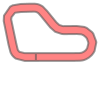

In [2]:
# load track and assign border variables
l_center_line, l_inner_border, l_outer_border, road_poly = tu.load_track(f'reinvent_base', absolute_path=projectDir)
road_poly

## Evaluation Analysis

#### Downloading Log Files
The files will download in a .tar format. 
- Download the file
- extract the file with: tar -xvf [file name]
- The log files will be in their respective training/evaluation folders

In [5]:
# Print the log file name
log_files = !ls DL-centerline-speed-clone/logs/evaluation
log_files

['evaluation-20210204142427-Th5D0M15SluAL5SLQj_iWg-robomaker.log']

In [6]:
# Log file
log_filename = log_files[0]
evaluation_log = f'{projectDir}/DL-centerline-speed-clone/logs/evaluation/{log_filename}'

# load into pandas df
eval_df = la.load_eval_data(evaluation_log)

In [7]:
# View the dataframe
eval_df.head()

,iteration,episode,steps,x,y,yaw,steer,throttle,action,reward,done,on_track,progress,closest_waypoint,track_len,timestamp
0,1,0,3,320.33,68.28,0.0955,0.0,1.0,6.0,1.0,0,True,0.8108,1,17.71,5.28
1,1,0,4,321.99,68.17,-0.1921,-15.0,3.0,5.0,1.0,0,True,0.9043,1,17.71,5.349
2,1,0,5,324.63,67.97,-0.6433,-15.0,3.0,5.0,1.0,0,True,1.0536,1,17.71,5.416
3,1,0,6,329.25,67.60,-1.4354,0.0,1.0,6.0,1.0,0,True,1.3142,2,17.71,5.489
4,1,0,7,335.60,66.86,-2.7744,30.0,1.0,12.0,1.0,0,True,1.6728,2,17.71,5.545


In [8]:
eval_df[eval_df.episode==0].steps

0        3
1        4
2        5
3        6
4        7
      ... 
186    189
187    190
188    191
189    192
190    193
Name: steps, Length: 191, dtype: int64

In [9]:
eval_df.tail()

,iteration,episode,steps,x,y,yaw,steer,throttle,action,reward,done,on_track,progress,closest_waypoint,track_len,timestamp
494,1,2,105,385.06,304.43,176.0235,0.0,1.0,6.0,0.001,0,False,49.1776,58,17.71,39.607
495,1,2,106,378.38,305.15,175.4519,-30.0,2.0,1.0,0.001,0,False,49.4449,58,17.71,39.683
496,1,2,107,370.52,306.15,174.6161,-30.0,2.0,1.0,0.001,0,False,49.7666,59,17.71,39.752
497,1,2,108,360.76,308.82,170.8275,-30.0,2.0,1.0,0.001,0,False,50.2581,59,17.71,39.815
498,1,2,109,351.90,312.25,166.5234,-30.0,2.0,1.0,0.001,1,False,50.7244,60,17.71,39.88


## View the path of the DeepRacer Car

/sas/sasdata/users/ld07716/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/sas/sasdata/users/ld07716/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


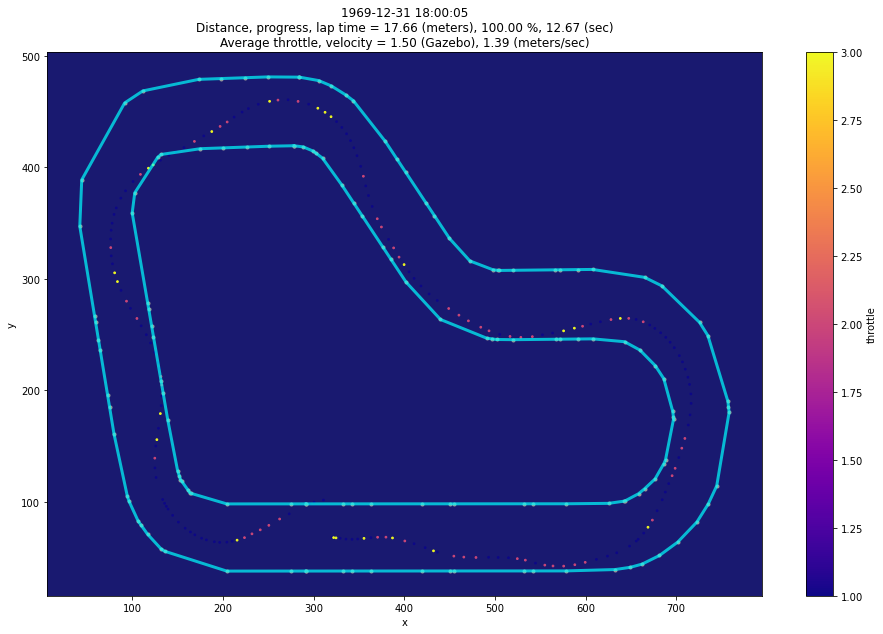

/sas/sasdata/users/ld07716/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/sas/sasdata/users/ld07716/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<Figure size 432x288 with 0 Axes>

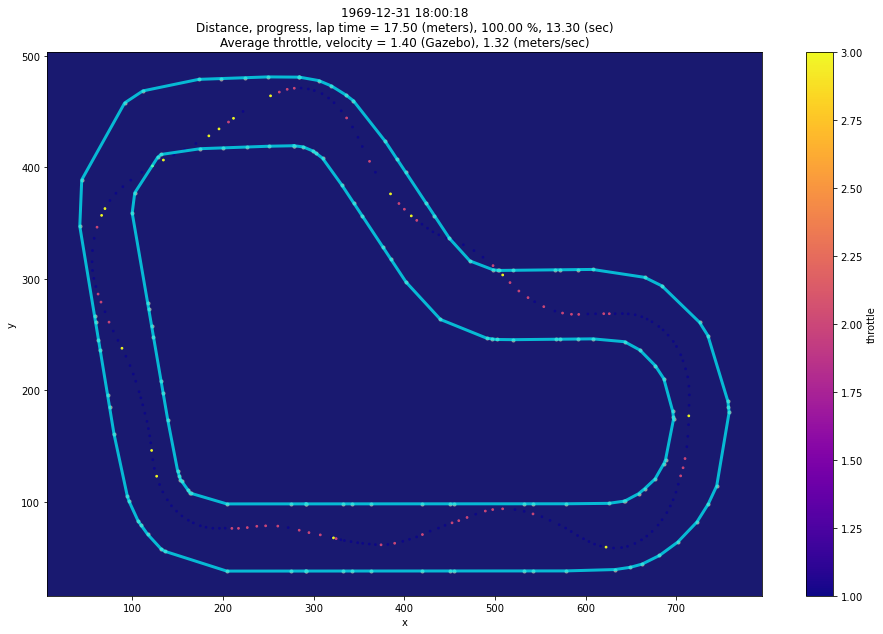

/sas/sasdata/users/ld07716/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/sas/sasdata/users/ld07716/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<Figure size 432x288 with 0 Axes>

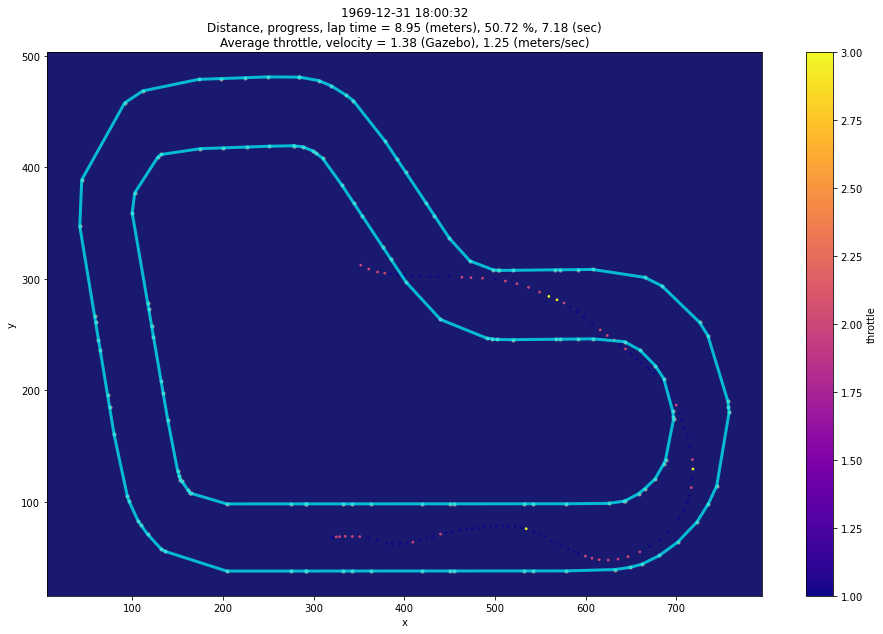

<Figure size 432x288 with 0 Axes>

In [10]:
joe_print_eval = la.analyse_single_evaluation(evaluation_log, l_inner_border, l_outer_border, episodes=3)
joe_print_eval

## Plotting Progress

The following code chunks do the following:
- import training log files (use the robomaker logs)
- generate a custom graph of progress
- use the log_analysis class to output graphs

#### Import Training Log

In [70]:
# import log file from training
# racingline-speed: 'DL-racingline-speed-version2-clone', training-20210205063910-yYUXLgdcQxOYeqQsjEFxnA-robomaker.log'
# centerline-speed: 'DL-centerline-speed', 'training-20210204051633-yv2A1t5NQLKkK6n2QqARCA-robomaker.log'
logfolder = 'DL-centerline-speed'
logfile = 'training-20210204051633-yv2A1t5NQLKkK6n2QqARCA-robomaker.log'

# logfolder = 'DL-racingline-speed-version2-clone'
# logfile = 'training-20210205063910-yYUXLgdcQxOYeqQsjEFxnA-robomaker.log'

training_log = f'{projectDir}/{logfolder}/logs/training/{logfile}'

# load into pandas df
training = la.load_data(training_log)
training_df = la.convert_to_pandas(training)
training_df.head()

,iteration,episode,steps,x,y,yaw,steer,throttle,action,reward,done,on_track,progress,closest_waypoint,track_len,timestamp
0,1,0,3,320.19,68.29,0.1192,-15.0,1.0,3.0,2.0,0,True,0.8029,1,17.71,22.114
1,1,0,4,321.88,68.08,-0.4122,15.0,3.0,11.0,2.0,0,True,0.8980,1,17.71,22.185
2,1,0,5,331.23,67.77,-0.9325,30.0,1.0,12.0,2.0,0,True,1.4263,2,17.71,22.209
3,1,0,6,334.01,68.07,-0.3234,30.0,3.0,14.0,2.0,0,True,1.5832,2,17.71,22.333
4,1,0,7,336.17,68.36,0.4288,15.0,3.0,11.0,2.0,0,True,1.7053,2,17.71,22.377


#### Custom Graph of Progress

In [71]:
import plotly.graph_objects as go

# Number of episodes per iteration
num_episodes = len(training_df[training_df.iteration==1].episode.unique()) # 20 episodes per iteration


# Data for first trace
x = 'episode'
y = 'progress'
g = training_df.groupby(x)[y].mean()
g = pd.DataFrame(g).reset_index()

# initialize graph
fig = go.Figure()

# Scatter plot of episode by progress
fig.add_trace(go.Scatter(x=g[x], y=g[y], 
                         mode='markers', 
                         name='progress by episode',
                         line=dict(color='orange')
                        ))

# add line
x2 = 'iteration'
y2 = 'progress'
g2 = training_df.groupby(x2)[y2].mean()
g2 = pd.DataFrame(g2).reset_index()
fig.add_trace(go.Scatter(x=g2[x2]*num_episodes, y=g2[y2],
                         name='progress by iteration',
                         line=dict(color='firebrick', width=4)
                        ))

# label axes
fig.update_xaxes(title_text=f'{x}')
fig.update_yaxes(title_text=f'{y}')

# layout
fig.update_layout(
    title_text=f'{y}'.upper(),
    template='simple_white'
)
fig.show()

#### log_analysis graphs

new reward not found, using reward as its values
Number of episodes =  599
Number of iterations =  30


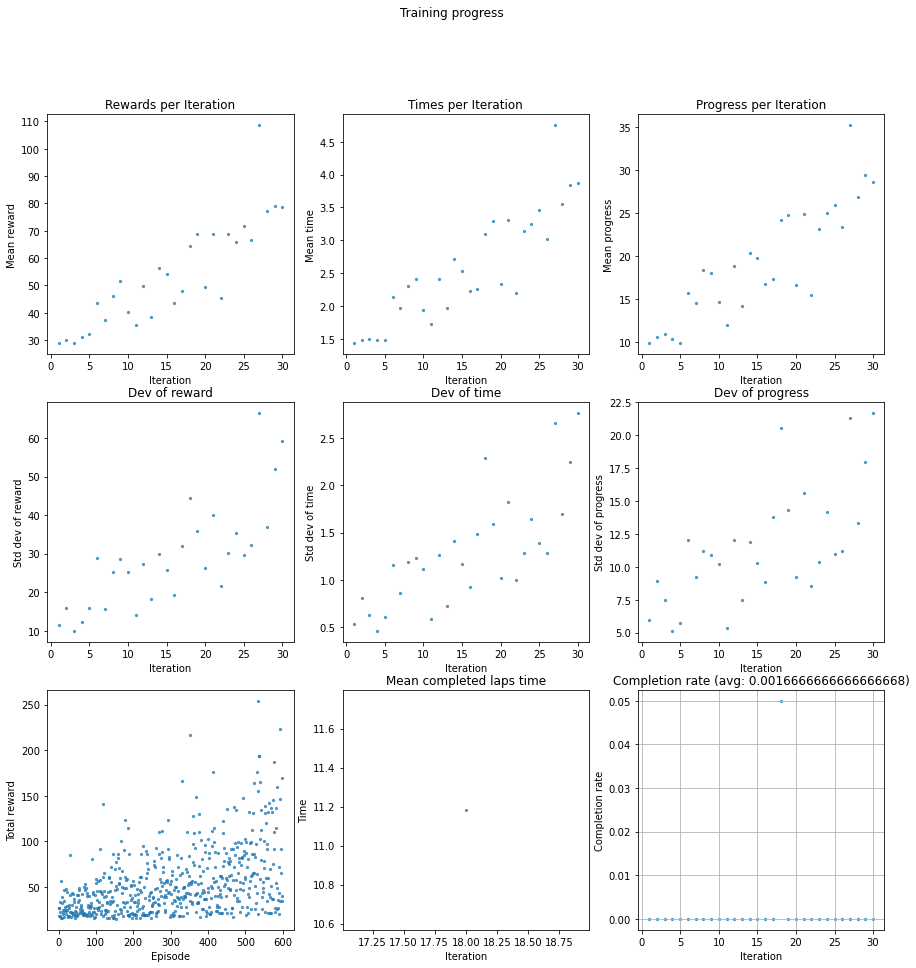

<Figure size 432x288 with 0 Axes>

In [72]:
simulation_agg = la.simulation_agg(training_df)
la.analyze_training_progress(simulation_agg, title='Training progress')

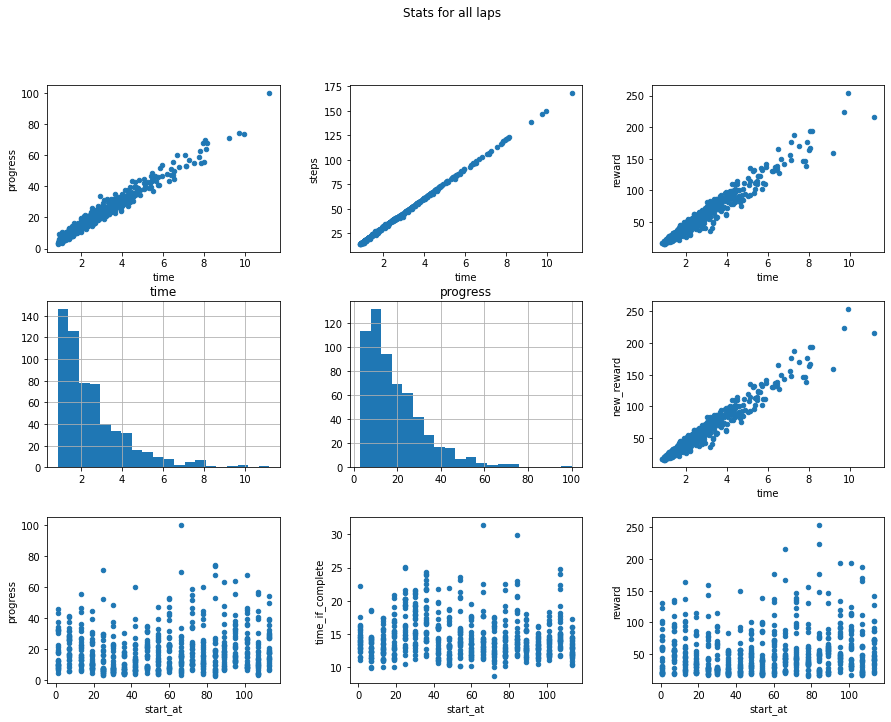

<Figure size 432x288 with 0 Axes>

In [73]:
la.scatter_aggregates(simulation_agg, 'Stats for all laps')